##### ----------------------Notes---------------------
* This code DOES NOT use regridded datafiles.

##### ------------------------------------------------

### Set up workspace

In [1]:
import sys
sys.path.append('../')

In [2]:
######################## Load modules ###################################
%matplotlib inline
import sys
import importlib
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

####################### Set up directory structure ######################
from plants_and_TCR.analyze_data import make_tcr_dataset
from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.process_data import calculate_tcr_time_series

path_output = directory_information.DIR_PROCESSED_DATA
FIGURE_PATH = directory_information.DIR_OUTPUT_FIGURES

In [3]:
FONTSIZE=20

# Calculate TCRs

In [ ]:
# Calculate from scratch
TCR_DICT = calculate_tcr_time_series.create_tcr_datasets(tcr_types=['RAD','TOT','PHYS','TOT-RAD'],
                                                         average_types=['global','land'],
                                                         save_tcr_dict=True,
                                                         recalculate_TCRs=True)

In [4]:
# Load precalculated
DIR_TCR_DICT = directory_information.DIR_TCR_DICT
TCR_DICT = pickle.load(open(DIR_TCR_DICT+'TCR_dict.pickle', "rb"))

### Calculate TCRs

In [5]:
TCR_global = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                               end_yr=70,
                                               varname='tas',
                                               average_type='global',
                                               tcr_types=['RAD','TOT','TOT-RAD','PHYS'])
T140_global = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                               end_yr=130,
                                               varname='tas',
                                               average_type='global',
                                               tcr_types=['RAD','TOT','TOT-RAD','PHYS'])

TCR_global['RAD_pct'] = TCR_global['RAD']*100/TCR_global['TOT']
TCR_global['TOT-RAD_pct'] = TCR_global['TOT-RAD']*100/TCR_global['TOT']
TCR_global['PHYS_pct'] = TCR_global['PHYS']*100/TCR_global['TOT']

T140_global['RAD_pct'] = T140_global['RAD']*100/T140_global['TOT']
T140_global['TOT-RAD_pct'] = T140_global['TOT-RAD']*100/T140_global['TOT']
T140_global['PHYS_pct'] = T140_global['PHYS']*100/T140_global['TOT']

In [97]:
TCR_land = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                               end_yr=70,
                                               varname='tas',
                                               average_type='land',
                                               tcr_types=['RAD','TOT','TOT-RAD','PHYS'])
T140_land = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                               end_yr=130,
                                               varname='tas',
                                               average_type='land',
                                               tcr_types=['RAD','TOT','TOT-RAD','PHYS'])

TCR_land['RAD_pct'] = TCR_land['RAD']*100/TCR_land['TOT']
TCR_land['TOT-RAD_pct'] = TCR_land['TOT-RAD']*100/TCR_land['TOT']
TCR_land['PHYS_pct'] = TCR_land['PHYS']*100/TCR_land['TOT']

T140_land['RAD_pct'] = T140_land['RAD']*100/T140_land['TOT']
T140_land['TOT-RAD_pct'] = T140_land['TOT-RAD']*100/T140_land['TOT']
T140_land['PHYS_pct'] = T140_land['PHYS']*100/T140_land['TOT']

In [98]:
TCR_land['RAD_pct'] = TCR_land['RAD']*100/TCR_land['TOT']
TCR_land['TOT-RAD_pct'] = TCR_land['TOT-RAD']*100/TCR_land['TOT']
TCR_land['PHYS_pct'] = TCR_land['PHYS']*100/TCR_land['TOT']

T140_land['RAD_pct'] = T140_land['RAD']*100/T140_land['TOT']
T140_land['TOT-RAD_pct'] = T140_land['TOT-RAD']*100/T140_land['TOT']
T140_land['PHYS_pct'] = T140_land['PHYS']*100/T140_land['TOT']

In [32]:
col_order = ['TOT','RAD','RAD_pct','PHYS','PHYS_pct','TOT-RAD','TOT-RAD_pct']
TCR_global = TCR_global.reindex(columns=col_order)
T140_global = T140_global.reindex(columns=col_order)

In [33]:
cmip6_model_order = ['BCC-CSM2-MR','CanESM5','CESM2','GFDL-ESM4','UKESM1-0-LL','IPSL-CM6A-LR',
                    'NorESM2-LM','MPI-ESM1-2-LR','ACCESS-ESM1-5','CNRM-ESM2-1','GISS-E2-1-G','MIROC-ES2L']

In [111]:
cmip_cutoff=8
TCR_global_CMIP5 = TCR_global[0:cmip_cutoff]
TCR_global_CMIP6 = TCR_global[cmip_cutoff:len(TCR_global)]
T140_global_CMIP5 = T140_global[0:cmip_cutoff]
T140_global_CMIP6 = T140_global[cmip_cutoff:len(TCR_global)]

TCR_land_CMIP5 = TCR_land[0:cmip_cutoff]
TCR_land_CMIP6 = TCR_land[cmip_cutoff:len(TCR_global)]
T140_land_CMIP5 = T140_land[0:cmip_cutoff]
T140_land_CMIP6 = T140_land[cmip_cutoff:len(TCR_global)]

TCR_global_CMIP6 = TCR_global_CMIP6.reindex(cmip6_model_order)
T140_global_CMIP6 = T140_global_CMIP6.reindex(cmip6_model_order)

In [66]:
T140_global_CMIP6.std().round(1)

TOT            1.0
RAD            1.0
RAD_pct        2.5
PHYS           0.2
PHYS_pct       2.9
TOT-RAD        0.1
TOT-RAD_pct    2.5
dtype: float64

In [120]:
print('Global')
print(np.round(1-TCR_global_CMIP6['RAD'].std()/TCR_global_CMIP6['TOT'].std(),3))
print(np.round(1-T140_global_CMIP6['RAD'].std()/T140_global_CMIP6['TOT'].std(),3))
print('Land')
print(np.round(1-TCR_land_CMIP6['RAD'].std()/TCR_land_CMIP6['TOT'].std(),3))
print(np.round(1-T140_land_CMIP6['RAD'].std()/T140_land_CMIP6['TOT'].std(),3))

Global
0.081
0.039
Land
0.136
0.097


In [ ]:
Standard deviation contribution implied by physiology:
    TCR = 8.1%; T140 = 3.9%
LAND:
    TCR = 13.6%; T140=9.7%

In [82]:
from plants_and_TCR.generate_figures import plot_scatter_CMIP
import importlib
importlib.reload(plot_scatter_CMIP)

<module 'plants_and_TCR.generate_figures.plot_scatter_CMIP' from '../plants_and_TCR/generate_figures/plot_scatter_CMIP.py'>

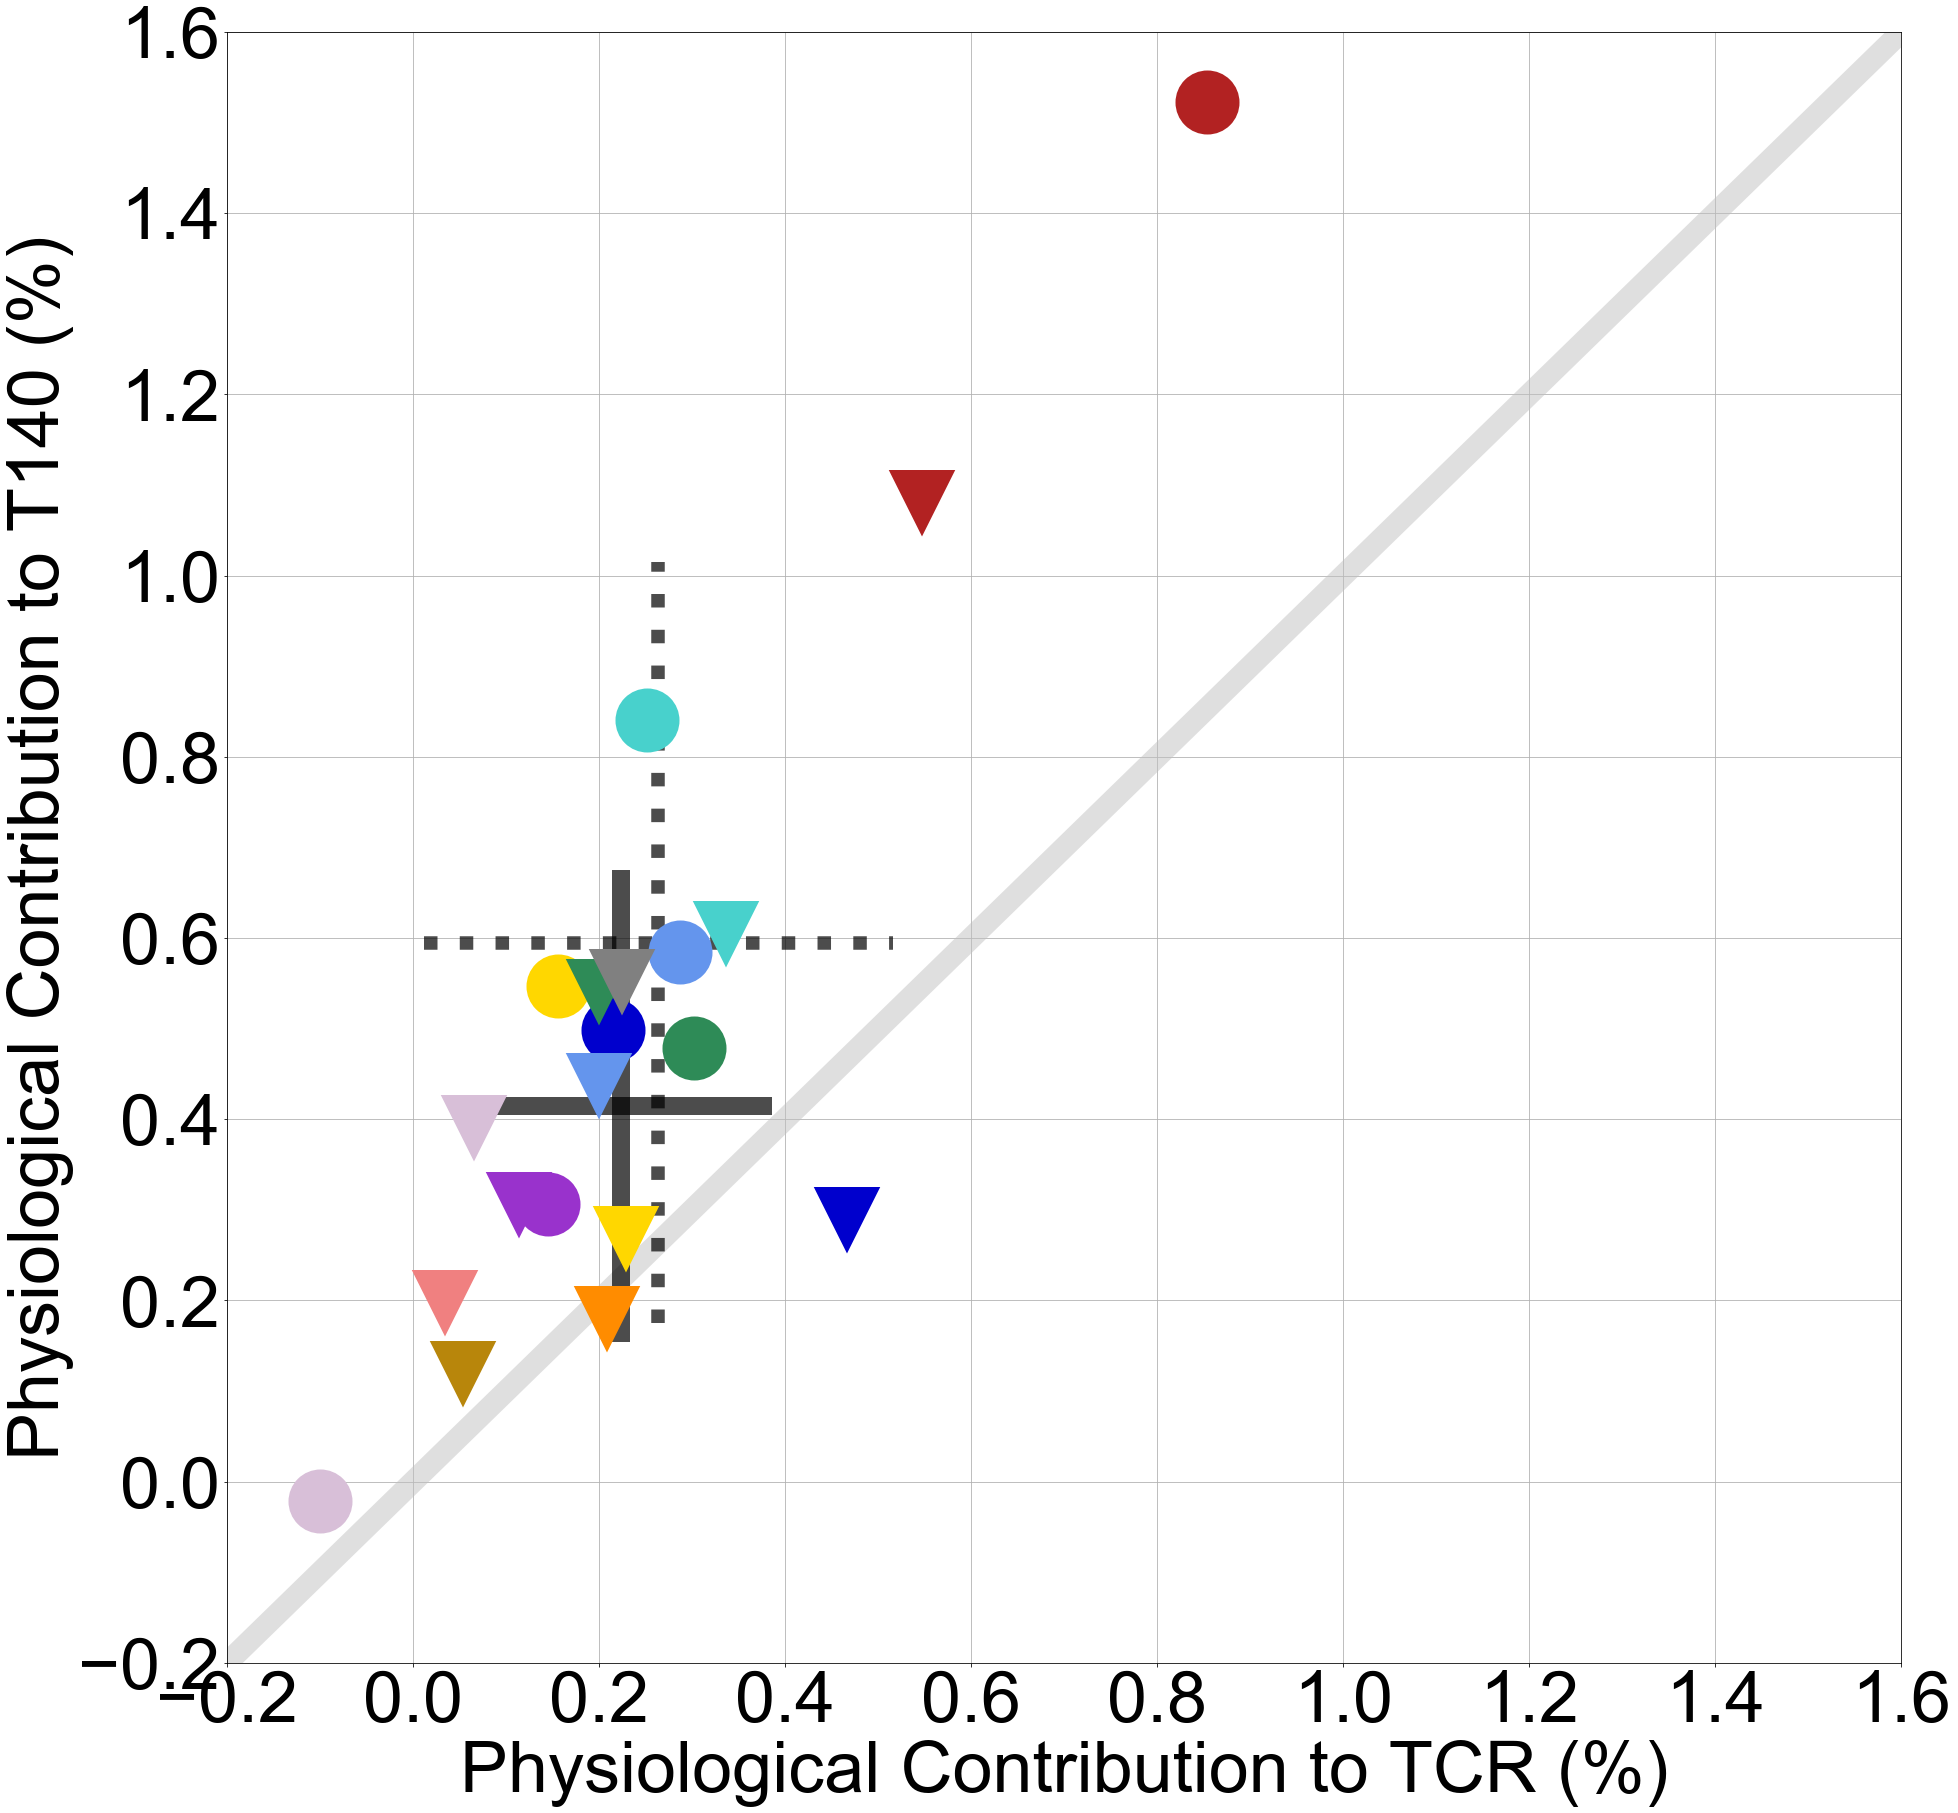

In [106]:
xvals = TCR_land['TOT-RAD'].values
yvals = T140_land['TOT-RAD'].values
#plt.plot([0,15],[0,15],'-k')
#plt.plot(, ,'.')
#plt.xlabel('TCR')
#plt.ylabel('T140')

XLIMS = [-0.2,1.6] #[-2,15]; [-0.1,0.9] 
YLIMS =  [-0.2,1.6]#[-2,15]; [-0.1,0.9] 
XLABEL = 'Physiological Contribution to TCR (%)';
YLABEL = 'Physiological Contribution to T140 (%)';
plot_scatter_CMIP.plot_scatter_CMIP(xvals, yvals,
                                    one_to_one_line=True,
                                    xlims=XLIMS, ylims=YLIMS,
                                    xlabel=XLABEL, ylabel=YLABEL,
                                    legend_on=False, filled=True, dt=0.2,
                                    fig_dims=[30,30],
                                    filepath=FIGURE_PATH+'TCRvT140', 
                                    markersize=60, ncols=4)



### Summary Statistics

0.6801370744948005

In [54]:
T140_global_CMIP6.max() - T140_global_CMIP6.min()

RAD    2.812469
TOT    2.906536
dtype: float64

In [55]:
2.812469/2.906536

0.9676360451066149